# Solving differential equations with Python

In [1]:
import numpy as np # linear algebra library for python
from matplotlib import pyplot as plt # this statement will import the pytplot module with the alias plt

Let us solve the following differential equation numerically
$$ \frac{d}{dx}y(x) = - y(x) $$
subject to the initial condition $y(0) = 1$. The first method that we are going to use to solve this is forward Euler. The idea is to discretize the derivative
$$ \frac{d}{dx}y(x) \approx \frac{y(x + \Delta x) - y(x)}{\Delta x} $$
so that we have the system of equations
$$ y(x_i + \Delta x) = y(x_i) + \left. \frac{d y}{d x} \right|_{x_i} \Delta x $$
For the above equation $d y / d x = - y(x)$ so that
$$ y(x_i + \Delta x) = y(x_i) - y(x_i) \Delta x $$
Using the above update rule we can propagate forward in $x$. Initial condition is $y(0) = 1$.

In [37]:
# step size for the grid
delta_x = 0.1
# vector for the x grid
x_lat = np.arange(0, 10 + delta_x, delta_x)
# vector for the y grid
y_lat = np.zeros(x_lat.shape) # this creates a vector of the same shape as x_lat filled with zeros.
y_lat[0] = 1 # initial condition

Let us use a loop to propagate with the update condition

In [38]:
dim = len(x_lat)
for i in range(dim-1) : # this is a for loop
    y_lat[i+1] = y_lat[i] - y_lat[i] * delta_x

In [39]:
y_actual = np.exp(-x_lat)

In [40]:
import os

In [41]:
os.getcwd()

'D:\\qftonqc\\tutorials\\t2'

In [43]:
os.makedirs('.\\plots', exist_ok = True)

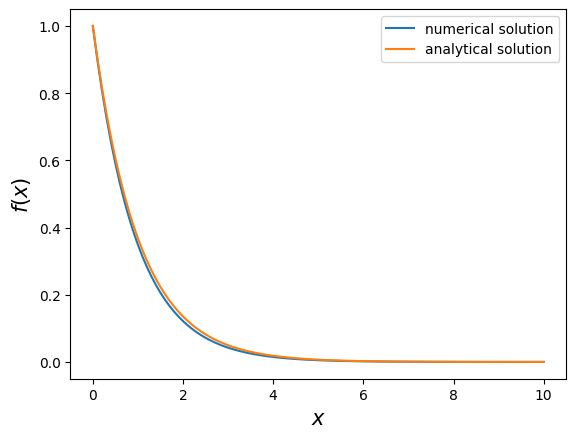

In [44]:
plt.plot(x_lat, y_lat, label = 'numerical solution')
plt.plot(x_lat, y_actual, label = 'analytical solution')
plt.xlabel('$x$', size = 15)
plt.ylabel('$f(x)$', size = 15)
plt.legend()
plt.savefig('.\\plots\\forwardeuler.png', dpi = 300)
plt.show()

Agreement is great but say you want better. We can use a corrector step with explicit Euler for better convergence. Consider the following differential equation

\begin{equation}
\frac{d y}{d x} = f(x, y(x))
\end{equation}

The idea is to take the _average_ slope. First, we can use an explicit method like forward Euler to propagate. This is called the predictor step

\begin{aligned}
y_{i+1} &= y_i + \Delta x\, f(x_i, y_i), &\quad &\text{(predictor step)} \\
y_{i+1} &= y_i + \frac{\Delta x}{2} \big(f(x_i, y_i) + f(x_{i+1}, y_{i+1})\big) &\quad &\text{(corrector step)}
\end{aligned}

We can repeat the corrective step multiple times for better convergence. Usually one corrective step is enough.

In [45]:
delta_x = 0.1

In [55]:
x_lat = np.arange(0, 10 + delta_x, delta_x)

In [56]:
y_pc = np.zeros(x_lat.shape)
y_pc[0] = 1

In [57]:
import time

In [58]:
dim = len(y_pc)

In [59]:
n_corr = 1 # number of corrective steps
start_time = time.time()
for i in range(dim - 1) :
    y_pc[i+1] = y_pc[i] - y_pc[i] * delta_x
    for _ in range(n_corr) :
        y_pc[i+1] = y_pc[i] - 0.5 * delta_x * (y_pc[i] + y_pc[i+1])
end_time = time.time() - start_time
print(f'Computed in {end_time} seconds')

Computed in 0.0003600120544433594 seconds


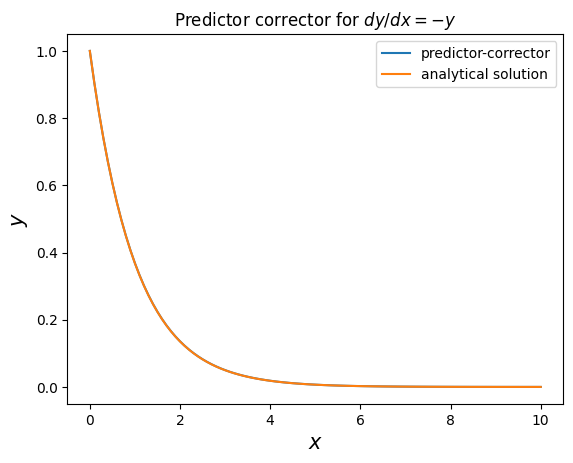

In [65]:
plt.plot(x_lat, y_pc, label = 'predictor-corrector')
plt.plot(x_lat, y_actual, label = 'analytical solution')
plt.xlabel('$x$', size = 15)
plt.ylabel('$y$', size = 15)
plt.title('Predictor corrector for $d y/ dx = - y $')
plt.savefig('.\\predictorcorrector.png')
plt.legend()

Other methods also exist (rk4, etc.) but I have found predictor corrector to be the easiest to implement

## Second-order differential equations
So far so good. But most differential equations in Physics are second order
$$ \frac{d^2}{d x^2}f(x) = G(x, f(x)) $$
One way to deal with such equations is to write
$$
\begin{equation}
\begin{split}
g(x) &= \frac{d}{dx} f(x) \\
\frac{d}{dx} g(x) &= G(x, f(x))
\end{split}
\end{equation}
$$
Proceed with the discretization
$$
\begin{equation}
\begin{split}
f(x_{i+1}) &:= f(x_i + \Delta x) = f(x_i) + g(x_i) \Delta x \\
g(x_{i+1}) &:= g(x_i + \Delta x) = g(x_i) + G(x_i, f(x_i)) \Delta x
\end{split}
\end{equation}
$$
Let us try this with our favorite system
$$
\frac{d^2}{dt^2} x(t) = - \omega^2 x(t)
$$
I will define $dx/dt = v(t)$ so that the equations are now
$$
\begin{equation}
\begin{split}
v(t) &= \frac{d}{dt}x(t) \\
\frac{d}{dt}v(t) &= - \omega^2 x(t)
\end{split}
\end{equation}
$$
So the discretized versions are
$$
\begin{equation}
\begin{split}
x(t_{i+1}) &= x(t_i) + v(t_i) \Delta t \\
v(t_{i+1}) &= v(t_i) - \omega^2 x(t_i) \Delta t
\end{split}
\end{equation}
$$
These are our update equations. So let's code this system. I will set $\omega = 1$ and use the initial conditions $x(0) = 0, v(0) = 1$. You can guess that the solution is $x(t) = \sin(t)$.

# Forward Euler implementation

In [76]:
delta_t = 0.1 # make your step size smaller
omega = 1
times = np.arange(0, 10 + delta_t, delta_t)
x_lat = np.zeros(times.shape) # position x(t) initialized to an array of zeros
v_lat = np.zeros(times.shape) # velocity v(t) initialized to an array of zeros

# these are the initial conditions
x_lat[0] = 0
v_lat[0] = 1

In [77]:
dim_t = len(times)
start_time = time.time()
for i in range(dim_t - 1) :
    x_lat[i+1] = x_lat[i] + v_lat[i] * delta_t
    v_lat[i+1] = v_lat[i] - omega ** 2 * x_lat[i] * delta_t
end_time = time.time() - start_time
print(f'Completed in {end_time} seconds')

Completed in 0.0 seconds


In [78]:
x_true = np.sin(times) # analytical solution

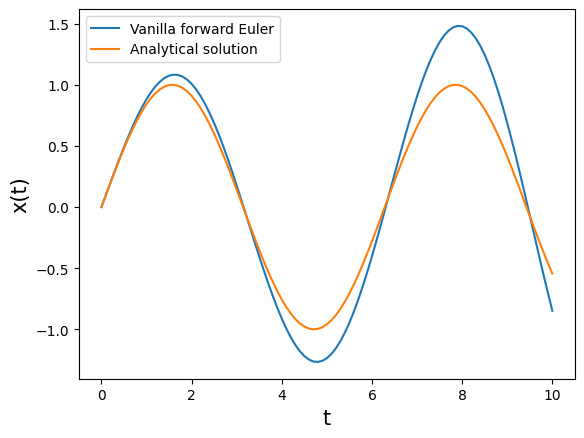

In [79]:
plt.plot(times, x_lat, label = 'Vanilla forward Euler')
plt.plot(times, x_true, label = 'Analytical solution')
plt.ylabel('x(t)', size = 15)
plt.xlabel('t', size = 15)
plt.legend()
plt.show()

So agreement is not that great... can fix this by taking a finer grid, but sometimes we run into memory constriants. Let us try predictor-corrector.

In [80]:
# these are the empty grids
x_lat_pc = np.zeros(times.shape)
v_lat_pc = np.zeros(times.shape)

# these are the initial conditions
x_lat_pc[0] = 0
v_lat_pc[0] = 1

The following is the code for the predictor-corrector algorithm.

In [81]:
n_corr = 1 # number of corrective steps
for i in range(dim_t - 1) :
    x_lat_pc[i + 1] = x_lat_pc[i] + v_lat_pc[i] * delta_t
    v_lat_pc[i + 1] = v_lat_pc[i] - omega ** 2 * x_lat_pc[i] * delta_t
    for _ in range(n_corr) :
        v_lat_pc[i + 1] = v_lat_pc[i] - 0.5 * omega ** 2 * delta_t * ( x_lat_pc[i] + x_lat_pc[i + 1] )
        x_lat_pc[i + 1] = x_lat_pc[i] + 0.5 * delta_t * ( v_lat_pc[i] + v_lat_pc[i + 1] )

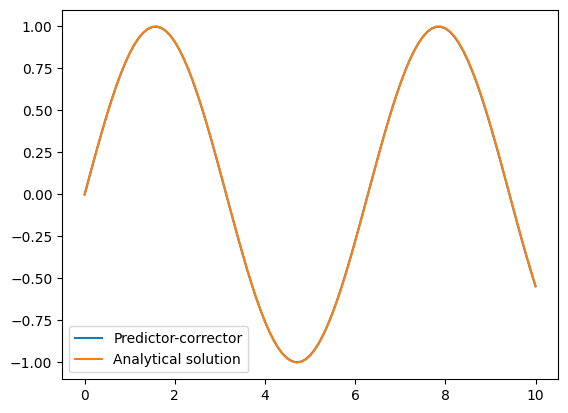

In [82]:
plt.plot(times, x_lat_pc, label = 'Predictor-corrector')
plt.plot(times, x_true, label = 'Analytical solution')
plt.legend()
plt.show()

# Damped harmonic oscillator

Let's push a bit further and have a damping term
$$
F = m \frac{d^2 x}{d t^2} = - m \omega_0^2 x - c \frac{d x}{d t}
$$
where $\omega_0 = \sqrt{k / m}$ is the undamped angular frequency. We will define the 'damping ratio' $\zeta = c / 2 \sqrt{mk}$. The differential equation that we have is
$$ \frac{d^2 x}{dt^2} + 2 \zeta \omega_0 \frac{dx}{dt} + \omega_0^2 x = 0 $$
The most general solution to this equation is
$$
\begin{equation}
\begin{split}
x(t) &= A e^{ i \omega_+ t} + B e^{i \omega_- t} \\
\omega_{\pm} &= \omega_0 ( i \zeta \pm \sqrt{1 - \zeta^2} )
\end{split}
\end{equation}
$$
Define $v(t) = d x(t) / d t$ so that our coupled set of differential equations are
$$
\begin{equation}
\begin{split}
\frac{d}{dt}v(t) &= - 2 \zeta \omega_0 v(t) - \omega_0^2 x(t) \\
\frac{d}{dt}x(t) &= v(t)
\end{split}
\end{equation}
$$
The discretized versions of these equations are
$$
\begin{equation}
\begin{split}
v_{i + 1} &= v_i - 2 \zeta \omega_0 v_i \Delta t- \omega_0^2 x_i \Delta t \\
x_{i + 1} &= x_i + v_i \Delta t
\end{split}
\end{equation}
$$

In [104]:
omega_0 = 1
zeta = 1

delta_t = 0.1
times = np.arange(0, 10 + delta_t, delta_t)

x_lat = np.arange(0, 10 + delta_t, delta_t)
v_lat = np.arange(0, 10 + delta_t, delta_t)

x_lat[0] = 0
v_lat[0] = 1

For the set of initial conditions $x(0) = 0, v(0) = 1$, the particular solution is
$$
x(t) =
\begin{cases}
\dfrac{e^{ - \zeta t  } \sin \Big( \sqrt{ 1 - \zeta^2 } \, \omega_0 t \Big)}{\omega_0 \sqrt{ 1 - \zeta ^2}} & \text{if } \zeta < 1 \\[2mm]
t \, e^{ - \zeta t } & \text{if } \zeta = 1 \\[2mm]
\dfrac{e^{ - \zeta t } \sinh \left( \sqrt{ \zeta^2 - 1 } \, \omega_0 t \right)}{ \omega_0 \sqrt{ \zeta^2 - 1} } & \text{if } \zeta > 1
\end{cases}
$$

In [105]:
# numerical solution, n_corr = 0 is just forward Euler
dim_t = len(times)
n_corr = 1
for i in range(dim_t - 1) :
    x_lat[i + 1] = x_lat[i] + v_lat[i] * delta_t
    v_lat[i + 1] = v_lat[i] - 2 * zeta * omega_0 * delta_t * v_lat[i] - omega_0 ** 2 * delta_t * x_lat[i]
    for _ in range(n_corr) :
        x_lat[i + 1] = x_lat[i] + 0.5 * delta_t * ( v_lat[i] + v_lat[i + 1] )
        v_lat[i + 1] = v_lat[i] - 2 * zeta * omega_0 * 0.5 * delta_t * ( v_lat[i + 1] + v_lat[i] ) - omega_0 ** 2 * 0.5 * delta_t * ( x_lat[i] + x_lat[i + 1] )

In [106]:
# x_true = np.exp( - zeta * times ) * np.sin(np.sqrt( 1 - zeta ** 2 ) * omega_0 * times ) /omega_0 /np.sqrt( 1 - zeta ** 2 )
x_true = times * np.exp( - zeta * times )
# x_true = np.exp( - zeta * times ) * np.sinh(np.sqrt(zeta ** 2 - 1) * omega_0 * times ) / omega_0 / np.sqrt( zeta ** 2 - 1 )

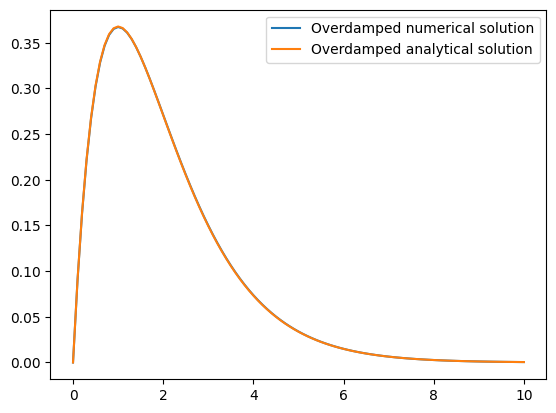

In [107]:
plt.plot(times, x_lat, label = 'Overdamped numerical solution')
plt.plot(times, x_true, label = 'Overdamped analytical solution')
plt.legend()
plt.show()